In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from math import exp
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from tensorflow.keras import regularizers
from mlxtend.plotting import plot_decision_regions

%matplotlib inline

In [ ]:
#Load the dataset
diabetesDF = pd.read_csv('diabetes.csv')
#diabetesDF.head()

In [ ]:
# create a scaler object
scaler = MinMaxScaler()
## fit and transform the data
df_norm = pd.DataFrame(scaler.fit_transform(diabetesDF), columns=diabetesDF.columns)

df_norm.describe

<bound method NDFrame.describe of      Pregnancies   Glucose  ...       Age  Outcome
0       0.352941  0.743719  ...  0.483333      1.0
1       0.058824  0.427136  ...  0.166667      0.0
2       0.470588  0.919598  ...  0.183333      1.0
3       0.058824  0.447236  ...  0.000000      0.0
4       0.000000  0.688442  ...  0.200000      1.0
..           ...       ...  ...       ...      ...
763     0.588235  0.507538  ...  0.700000      0.0
764     0.117647  0.613065  ...  0.100000      0.0
765     0.294118  0.608040  ...  0.150000      0.0
766     0.058824  0.633166  ...  0.433333      1.0
767     0.058824  0.467337  ...  0.033333      0.0

[768 rows x 9 columns]>

In [ ]:
X = df_norm.to_numpy()[:,0:8] 
Y = df_norm.to_numpy()[:,8]

#y = y.reshape(y.shape[-1],1)

X_train, X_rem, y_train, y_rem = train_test_split(X,y, train_size=0.6)
test_size = 0.5
X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.5)

print (f'Shape of Train Data : {X_train.shape}')
print (f'Shape of Test Data : {X_test.shape}')

Shape of Train Data : (460, 8)
Shape of Test Data : (154, 8)


In [ ]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [ ]:
def loss(y, y_hat):
    loss = -np.mean(y*(np.log(y_hat)) - (1-y)*np.log(1-y_hat))
    return loss

In [ ]:
def random_init(dim):
    w = np.zeros((dim,1))
    b = 0
    
    return w,b

In [ ]:
#Stochastic Gradient Descent
def SGD(w,b,X,y):
    
    m = X.shape[0]
    a = sigmoid(np.dot(X,w) + b)
    
    cost = loss(y, sigmoid(np.dot(X,w) + b))
    
    ##Calculating gradients
    dz = a-y
    dw  = np.dot(np.transpose(X),dz)/m
    db = np.sum(dz)/m
    
    grad = {
        "dw":dw,
        "db":db
    }
    return grad,cost

In [ ]:
#Stochaist Gradient Descent
def optimize(X, y, learning_rate, num_iteration):
    m = X.shape[0]
    w,b = random_init(X_train.shape[1])
    costs = []
    
    for i in range(num_iteration):
        grads, cost=SGD(w,b,X,y)
        
        dw = grads["dw"]
        db = grads["db"]
        
        #updating weights and bias
        w  = w - learning_rate*dw
        b  = b - learning_rate*db
          
        if(i%100==0):
            costs.append(cost)
        
    params= {
        "w":w,
        "b":b
    }
    grads = {
        "dw":dw,
        "db":db
    }
    return params,grads,costs

In [ ]:
params,grads,costs = optimize(X_train, y_train,0.06,4000)

print(params)
print(grads)
print(costs)

{'w': array([[ 1.27323351],
       [ 3.31351079],
       [-1.06099195],
       [ 0.46948146],
       [ 0.32594899],
       [ 1.45724325],
       [ 0.58128457],
       [ 1.36339543]]), 'b': -3.545458701077181}
{'dw': array([[-0.00097607],
       [-0.00901335],
       [ 0.00190288],
       [-0.00093413],
       [ 0.00098592],
       [-0.0059349 ],
       [-0.0014524 ],
       [-0.00088876]]), 'db': 0.008386056808756507}
[-0.2019167873805058, 0.028717984901971465, 0.03811982173835939, 0.03789555611022685, 0.03733071842388747, 0.03684307518210695, 0.03643308125899291, 0.03608547352088613, 0.03578759801424374, 0.035529556222237905, 0.03530362902017106, 0.035103790578766565, 0.03492532724217974, 0.034764541391077174, 0.03461852218297071, 0.034484968447487566, 0.034362052025287075, 0.03424831235050141, 0.03414257511200956, 0.03404388944767064, 0.033951479396137366, 0.03386470631878104, 0.03378303976744018, 0.033706034860785564, 0.03363331468245802, 0.03356455655913739, 0.03349948134076532, 0.

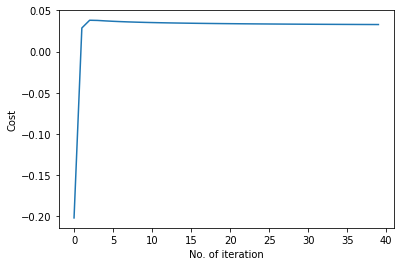

In [ ]:
costs = np.squeeze(costs)
plt.plot(costs)
plt.xlabel('No. of iteration')
plt.ylabel('Cost')
plt.show()

In [ ]:
def predict(w,b,X):
    a = sigmoid(np.dot(X,w) + b)
    return a

In [ ]:
#Set the range for predicting 1 and 0
def classification(x):
    if(x>=0.5):
        return 1
    elif(x<0.5):
        return 0

In [ ]:
temp = predict(params["w"],params["b"],X_train)
train_prediction = np.array(list(map(classification,temp)))
train_prediction = train_prediction.reshape((train_prediction.shape[0],1))

# Accuracy for test set:
temp = predict(params["w"],params["b"],X_test)
test_prediction = np.array(list(map(classification,temp)))
test_prediction = test_prediction.reshape((test_prediction.shape[0],1))

print("Training set accuracy = ",(100 - np.mean(np.abs(train_prediction - y_train))*100))
print("Test set accuracy = ",(100 - np.mean(np.abs(test_prediction - y_test))*100))

Training set accuracy =  74.34782608695652
Test set accuracy =  75.32467532467533


In [ ]:
model = Sequential()

In [ ]:
model.add(Dense(24, input_dim = (8), activation = 'relu'))
model.add(Dense(12, activation = 'relu', kernel_regularizer=tf.keras.regularizers.L2(0.01)))
model.add(Dense(12, activation = 'relu', kernel_regularizer=tf.keras.regularizers.L2(0.01)))
model.add(Dense(1, activation = 'sigmoid'))

model.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_84 (Dense)             (None, 24)                216       
_________________________________________________________________
dense_85 (Dense)             (None, 12)                300       
_________________________________________________________________
dense_86 (Dense)             (None, 12)                156       
_________________________________________________________________
dense_87 (Dense)             (None, 1)                 13        
Total params: 685
Trainable params: 685
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, epochs=200, batch_size=32, verbose = 1, validation_data=(X_test, y_test))

Epoch 1/200
15/15 [==============================] - 1s 16ms/step - loss: 0.9806 - accuracy: 0.4000 - val_loss: 0.9519 - val_accuracy: 0.6429
Epoch 2/200
15/15 [==============================] - 0s 4ms/step - loss: 0.9326 - accuracy: 0.6413 - val_loss: 0.9096 - val_accuracy: 0.6948
Epoch 3/200
15/15 [==============================] - 0s 5ms/step - loss: 0.8966 - accuracy: 0.6522 - val_loss: 0.8767 - val_accuracy: 0.6688
Epoch 4/200
15/15 [==============================] - 0s 5ms/step - loss: 0.8667 - accuracy: 0.6413 - val_loss: 0.8461 - val_accuracy: 0.6753
Epoch 5/200
15/15 [==============================] - 0s 3ms/step - loss: 0.8404 - accuracy: 0.6457 - val_loss: 0.8204 - val_accuracy: 0.6753
Epoch 6/200
15/15 [==============================] - 0s 3ms/step - loss: 0.8180 - accuracy: 0.6457 - val_loss: 0.8002 - val_accuracy: 0.6753
Epoch 7/200
15/15 [==============================] - 0s 5ms/step - loss: 0.8001 - accuracy: 0.6457 - val_loss: 0.7797 - val_accuracy: 0.6753
Epoch 8/200


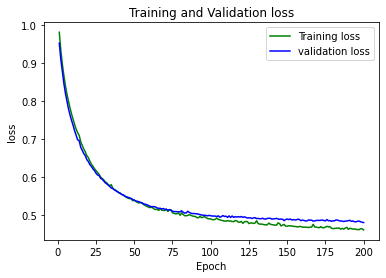

In [ ]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,201)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

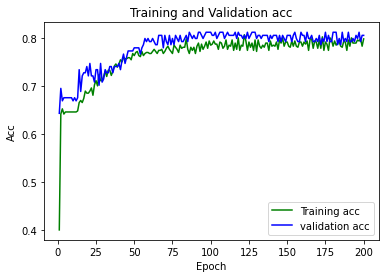

In [ ]:
loss_train = history.history['accuracy']
loss_val = history.history['val_accuracy']
epochs = range(1,201)
plt.plot(epochs, loss_train, 'g', label='Training acc')
plt.plot(epochs, loss_val, 'b', label='validation acc')
plt.title('Training and Validation acc')
plt.xlabel('Epoch')
plt.ylabel('Acc')
plt.legend()
plt.show()

In [ ]:
loss = model.evaluate(X_test, y_test, verbose=1, batch_size=30)

6/6 [==============================] - 0s 2ms/step - loss: 0.4808 - accuracy: 0.8052


In [ ]:
model2 = Sequential()

In [ ]:
model2.add(Dense(24, input_dim = (8), activation = 'relu'))
model2.add(Dense(12, activation = 'relu'))
model2.add(Dropout(0.25))
model2.add(Dense(12, activation = 'relu'))
model2.add(Dropout(0.25))
model2.add(Dense(1, activation = 'sigmoid'))

print(model2.summary())

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_88 (Dense)             (None, 24)                216       
_________________________________________________________________
dense_89 (Dense)             (None, 12)                300       
_________________________________________________________________
dropout_14 (Dropout)         (None, 12)                0         
_________________________________________________________________
dense_90 (Dense)             (None, 12)                156       
_________________________________________________________________
dropout_15 (Dropout)         (None, 12)                0         
_________________________________________________________________
dense_91 (Dense)             (None, 1)                 13        
Total params: 685
Trainable params: 685
Non-trainable params: 0
_______________________________________________________

In [ ]:
model2.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
history2 = model2.fit(X_train, y_train, epochs=200, batch_size=32, verbose = 1, validation_data=(X_test, y_test))

Epoch 1/200
15/15 [==============================] - 1s 15ms/step - loss: 0.7005 - accuracy: 0.4174 - val_loss: 0.6942 - val_accuracy: 0.4091
Epoch 2/200
15/15 [==============================] - 0s 6ms/step - loss: 0.6892 - accuracy: 0.5957 - val_loss: 0.6870 - val_accuracy: 0.6948
Epoch 3/200
15/15 [==============================] - 0s 4ms/step - loss: 0.6843 - accuracy: 0.6935 - val_loss: 0.6834 - val_accuracy: 0.6818
Epoch 4/200
15/15 [==============================] - 0s 5ms/step - loss: 0.6807 - accuracy: 0.6739 - val_loss: 0.6781 - val_accuracy: 0.6623
Epoch 5/200
15/15 [==============================] - 0s 5ms/step - loss: 0.6744 - accuracy: 0.6783 - val_loss: 0.6685 - val_accuracy: 0.6623
Epoch 6/200
15/15 [==============================] - 0s 5ms/step - loss: 0.6664 - accuracy: 0.6587 - val_loss: 0.6543 - val_accuracy: 0.6753
Epoch 7/200
15/15 [==============================] - 0s 5ms/step - loss: 0.6557 - accuracy: 0.6478 - val_loss: 0.6449 - val_accuracy: 0.6753
Epoch 8/200


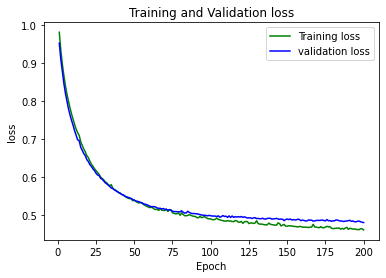

In [ ]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,201)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

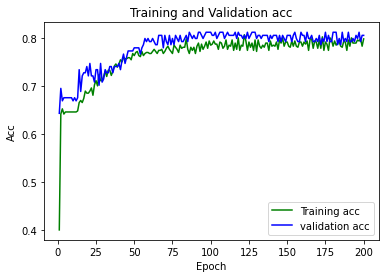

In [ ]:
loss_train = history.history['accuracy']
loss_val = history.history['val_accuracy']
epochs = range(1,201)
plt.plot(epochs, loss_train, 'g', label='Training acc')
plt.plot(epochs, loss_val, 'b', label='validation acc')
plt.title('Training and Validation acc')
plt.xlabel('Epoch')
plt.ylabel('Acc')
plt.legend()
plt.show()

In [ ]:
loss = model2.evaluate(X_test, y_test, verbose=1, batch_size=30)

6/6 [==============================] - 0s 2ms/step - loss: 0.4525 - accuracy: 0.7857
